In [78]:
import pandas as pd
spam = pd.read_csv("spambase.csv")
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [55]:
X = spam.drop("class",axis="columns")
y = spam["class"]

from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=1)

In [83]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(C=100,penalty="l2",solver="liblinear")
logr.fit(X_tr,y_tr)
logr.score(X_te,y_te)

0.9326818675352877

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),lor)
pipe.fit(X_tr,y_tr)
pipe.score(X_te,y_te)

0.9337676438653637

In [86]:
pd.Series(logr.coef_[0],index=X.columns).sort_values()

word_freq_george             -24.055873
word_freq_cs                  -8.573934
word_freq_hp                  -3.512677
word_freq_meeting             -1.940974
word_freq_lab                 -1.469316
word_freq_edu                 -1.460705
word_freq_hpl                 -1.181911
word_freq_85                  -1.177344
word_freq_re                  -0.981293
word_freq_conference          -0.934152
word_freq_project             -0.776980
word_freq_pm                  -0.477826
char_freq_%3B                 -0.379451
capital_run_length_average    -0.367801
word_freq_data                -0.346597
word_freq_labs                -0.287406
word_freq_original            -0.271247
char_freq_%5B                 -0.209782
word_freq_address             -0.196341
word_freq_table               -0.183580
word_freq_parts               -0.165103
word_freq_direct              -0.135774
word_freq_will                -0.132897
word_freq_1999                -0.124816
word_freq_make                -0.110128


In [75]:
from sklearn.linear_model import LogisticRegressionCV
pipe = make_pipeline(StandardScaler(),LogisticRegressionCV(Cs=32,cv=5,solver="liblinear",penalty="l2"))
pipe.fit(X_tr,y_tr)
pipe.score(X_te,y_te)

0.9348534201954397

In [77]:
pipe[1].C_

array([26.26363528])

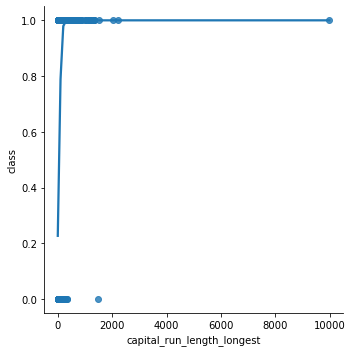

In [88]:
import seaborn as sns

sns.lmplot(data=spam,x="capital_run_length_longest",y="class",logistic=True)

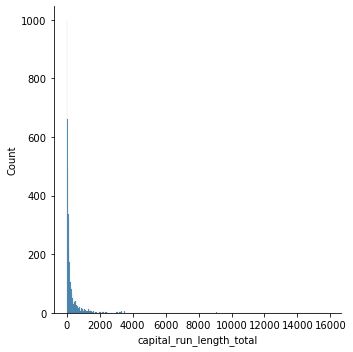

In [91]:
sns.displot(data=spam,x="capital_run_length_total")

In [94]:
def outlying(x):
    q25,q75 = x.quantile([.25,.75])
    iqr = q75-q25
    return (x < q25-1.5*iqr) | (x > q75+1.5*iqr)

spam.transform(outlying)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,True,True,True,False,True,...,False,False,False,False,True,True,False,True,True,False
2,True,False,False,False,True,True,True,True,True,False,...,True,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4599,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
